In [0]:
import pandas as pd

In [0]:
bird_data = pd.read_csv("bird_tracking.csv", index_col = 0)

In [10]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [11]:
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
ix = bird_data.bird_name == 'Eric'

In [0]:
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

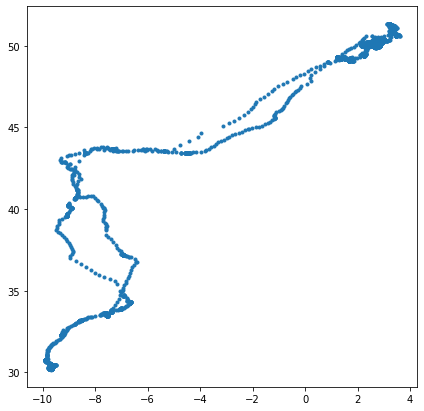

In [15]:
plt.figure(figsize= (7,7))
plt.plot(x, y, ".")

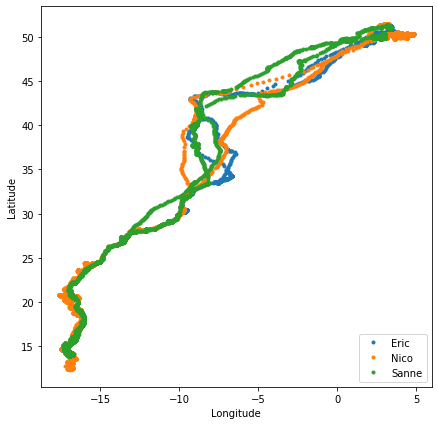

In [16]:
bird_names = pd.unique(bird_data.bird_name)
plt.figure(figsize = (7,7))
for bird_name in bird_names:
  ix = bird_data.bird_name == bird_name
  x, y = bird_data.longitude[ix], bird_data.latitude[ix]
  plt.plot(x, y, ".", label = bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig('3traj.pdf')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


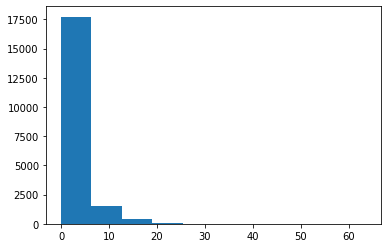

In [17]:
ix = bird_data.bird_name == 'Eric'
speed = bird_data.speed_2d[ix]
plt.hist(speed);

In [18]:
np.isnan(speed).any()

True

In [19]:
np.sum(np.isnan(speed))

85

In [0]:
ind= np.isnan(speed)

In [21]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

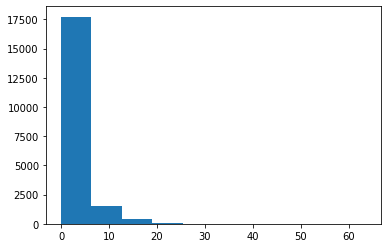

In [22]:
ix = bird_data.bird_name == 'Eric'
speed = bird_data.speed_2d[ix]
ind= np.isnan(speed)
plt.hist(speed[~ind]);
plt.savefig("hist.pdf")

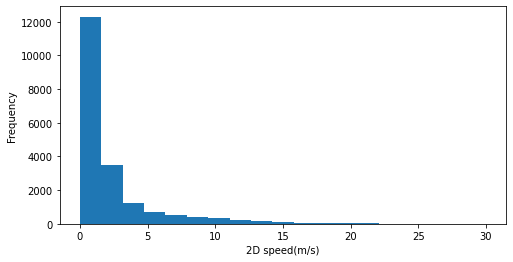

In [23]:
plt.figure(figsize=(8,4))
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']
ind= np.isnan(speed)
plt.hist(speed[~ind], bins= np.linspace(0,30,20));
plt.xlabel("2D speed(m/s)")
plt.ylabel("Frequency")
plt.savefig("hist2.pdf")

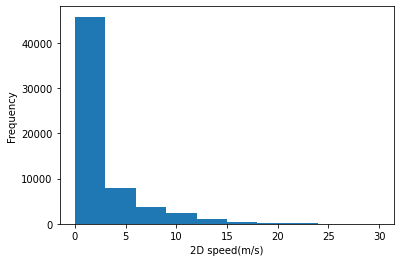

In [24]:
bird_data.speed_2d.plot(kind = 'hist', range= [0,30])
plt.xlabel("2D speed(m/s)")
plt.ylabel("Frequency")
plt.savefig("pd_hist.pdf")

In [25]:
bird_data.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [26]:
bird_data.date_time.head()

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
Name: date_time, dtype: object

In [0]:
import datetime

In [28]:
datetime.datetime.today()

datetime.datetime(2020, 5, 24, 23, 48, 13, 10033)

In [0]:
time1 = datetime.datetime.today()

In [0]:
time2=datetime.datetime.today()

In [31]:
time2-time1

datetime.timedelta(0, 0, 4844)

In [0]:
date_str = bird_data.date_time[0]

In [33]:
type(date_str)

str

In [34]:
date_str

'2013-08-15 00:18:08+00'

In [35]:
date_str[:-3]

'2013-08-15 00:18:08'

In [36]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [0]:
timestamp = []
for k in range(len(bird_data)):
  timestamp.append(datetime.datetime.strptime(bird_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [38]:
timestamp[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [0]:
bird_data["timestamp"] = pd.Series(timestamp, index = bird_data.index)

In [40]:
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [41]:
bird_data.timestamp[4] - bird_data.timestamp[3]

Timedelta('0 days 00:29:51')

In [0]:
times = bird_data.timestamp[bird_data.bird_name == 'Eric']

In [43]:
times

0       2013-08-15 00:18:08
1       2013-08-15 00:48:07
2       2013-08-15 01:17:58
3       2013-08-15 01:47:51
4       2013-08-15 02:17:42
                ...        
19790   2014-04-30 21:51:26
19791   2014-04-30 22:21:33
19792   2014-04-30 22:51:41
19793   2014-04-30 23:21:34
19794   2014-04-30 23:51:29
Name: timestamp, Length: 19795, dtype: datetime64[ns]

In [0]:
elapsed_time= [time - times[0] for time in times]

In [45]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [46]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [47]:
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [48]:
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

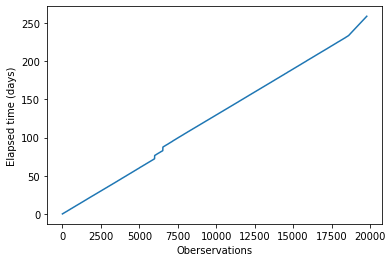

In [49]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Oberservations")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

In [0]:
data = bird_data[bird_data.bird_name == 'Eric']

In [0]:
times = data.timestamp

In [0]:
elapsed_time = [time - times[0] for time in times]

In [0]:
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

In [0]:
next_day = 1
inds= []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
  if (t<next_day):
    inds.append(i)
  else:
    daily_mean_speed.append(np.mean(data.speed_2d[inds]))
    next_day+=1
    ind=[]

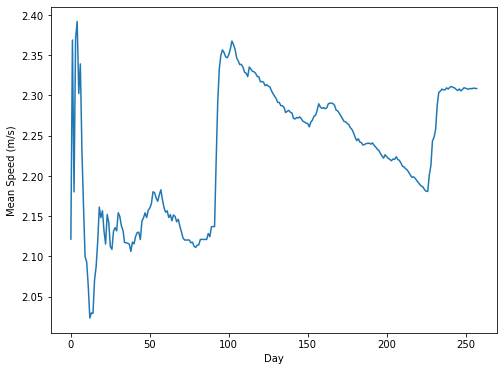

In [55]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean Speed (m/s)");
plt.savefig("dms.pdf")

In [0]:
!apt-get -qq install python-cartopy python3-cartopy

In [57]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Uninstalling Shapely-1.6.4:
  Would remove:
    /usr/lib/python3/dist-packages/Shapely-1.6.4.egg-info
    /usr/lib/python3/dist-packages/shapely
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.6.4
     |████████████████████████████████| 358kB 2.9MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [0]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [0]:
proj = ccrs.Mercator()

In [0]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')

for name in bird_name:
  ix= bird_data['bird_name'] == name
  x, y = bird_data.longitude[ix], bird_data.latitude[ix]
  ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc= "upperleft")
plt.savefig("map.pdf")